## Prevendo o risco de diabetes em estágio inicial em indivíduos usando Machine Learning

#### Datasource
+ https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
+ https://archive.ics.uci.edu/ml/machine-learning-databases/00529/

In [1]:
#Carregando as bibliotecas principais
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Carregando a base para um dataframe pandas
df = pd.read_csv('diabetes_data_upload.csv') 

#### Sobre o conjunto de dados
+ Fonte de dados:
    - https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#
+ Descrição:
    - O conjunto de dados foi coletado por meio de questionários diretos de pacientes do Sylhet Diabetes Hospital em Sylhet, Bangladesh, e aprovado por um médico.
    
+ Metadados:
    - O conjunto de dados é um conjunto de dados multivariável em formato CSV.
    - Possui 520 pontos de dados e 17 atributos.
    
+ Informação dos Atributos:
    - Age 16-90
    - Sex 1. Male, 2.Female
    - Polyuria 1.Yes, 2.No.
    - Polydipsia 1.Yes, 2.No.
    - sudden weight loss 1.Yes, 2.No.
    - weakness 1.Yes, 2.No.
    - Polyphagia 1.Yes, 2.No.
    - Genital thrush 1.Yes, 2.No.
    - visual blurring 1.Yes, 2.No.
    - Itching 1.Yes, 2.No.
    - Irritability 1.Yes, 2.No.
    - delayed healing 1.Yes, 2.No.
    - partial paresis 1.Yes, 2.No.
    - muscle stiffness 1.Yes, 2.No.
    - Alopecia 1.Yes, 2.No.
    - Obesity 1.Yes, 2.No.
    - Class 1.Positive, 2.Negative.

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Análise descritiva 

In [4]:
df.shape

(520, 17)

In [5]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
#Traduzindo para o português
df.columns = ['Idade',
              'Gênero',
              'Poliúria', #Expelir quantidades anormalmente grandes de urina.
              'Excesso de sede', #Sintoma para diabetes
              'Perca de peso repentina',
              'Fraqueza',
              'Polifagia', #Comer em excesso devido a fome excessiva ou apetite elevado.
              'Candidíase vaginal',
              'Visão embaçada',
              'Coceira',
              'Irritabilidade',
              'Cicatrização demorada',
              'Paralisia parcial',
              'Rigidez muscular',
              'Queda de cabelo',
              'Obesidade',
              'Tem diabetes'
            ]

In [7]:
#Deixando os nomes mais padronizados
df.columns.str.lower().str.replace(' ','_')
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df.head()

,idade,gênero,poliúria,excesso_de_sede,perca_de_peso_repentina,fraqueza,polifagia,candidíase_vaginal,visão_embaçada,coceira,irritabilidade,cicatrização_demorada,paralisia_parcial,rigidez_muscular,queda_de_cabelo,obesidade,tem_diabetes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   idade                    520 non-null    int64 
 1   gênero                   520 non-null    object
 2   poliúria                 520 non-null    object
 3   excesso_de_sede          520 non-null    object
 4   perca_de_peso_repentina  520 non-null    object
 5   fraqueza                 520 non-null    object
 6   polifagia                520 non-null    object
 7   candidíase_vaginal       520 non-null    object
 8   visão_embaçada           520 non-null    object
 9   coceira                  520 non-null    object
 10  irritabilidade           520 non-null    object
 11  cicatrização_demorada    520 non-null    object
 12  paralisia_parcial        520 non-null    object
 13  rigidez_muscular         520 non-null    object
 14  queda_de_cabelo          520 non-null    o

In [10]:
df.isnull().sum()

idade                      0
gênero                     0
poliúria                   0
excesso_de_sede            0
perca_de_peso_repentina    0
fraqueza                   0
polifagia                  0
candidíase_vaginal         0
visão_embaçada             0
coceira                    0
irritabilidade             0
cicatrização_demorada      0
paralisia_parcial          0
rigidez_muscular           0
queda_de_cabelo            0
obesidade                  0
tem_diabetes               0
dtype: int64

In [11]:
df['tem_diabetes'].value_counts()

Positive    320
Negative    200
Name: tem_diabetes, dtype: int64

In [12]:
# Acuracia base: 'chuta' que não tem diabetes
200/520

0.38461538461538464

### Data cleaning

#### Para poder utilizar os dados nos modelos de ML, irei alterar o dados para binário, sendo:
+ Gênero: Feminino = 0 e Masculino = 1
+ Outros: Não = 0 e Sim = 1

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#Vendo quais colunas tem o tipo Object
listaObj = df.select_dtypes(include='object').columns
listaObj

Index(['gênero', 'poliúria', 'excesso_de_sede', 'perca_de_peso_repentina',
       'fraqueza', 'polifagia', 'candidíase_vaginal', 'visão_embaçada',
       'coceira', 'irritabilidade', 'cicatrização_demorada',
       'paralisia_parcial', 'rigidez_muscular', 'queda_de_cabelo', 'obesidade',
       'tem_diabetes'],
      dtype='object')

In [15]:
columns_to_label_encode = ['poliúria', 'excesso_de_sede', 'perca_de_peso_repentina',
       'fraqueza', 'polifagia', 'candidíase_vaginal', 'visão_embaçada',
       'coceira', 'irritabilidade', 'cicatrização_demorada',
       'paralisia_parcial', 'rigidez_muscular', 'queda_de_cabelo', 'obesidade']

In [16]:
LE = LabelEncoder()

In [17]:
#Tranformando todas as colunas menos Gênero e Tem Diabetes
for col in columns_to_label_encode:
    df[col] = LE.fit_transform(df[col].astype(str))

In [18]:
df.dtypes #vendo se transformou o tipo da coluna 

idade                       int64
gênero                     object
poliúria                    int32
excesso_de_sede             int32
perca_de_peso_repentina     int32
fraqueza                    int32
polifagia                   int32
candidíase_vaginal          int32
visão_embaçada              int32
coceira                     int32
irritabilidade              int32
cicatrização_demorada       int32
paralisia_parcial           int32
rigidez_muscular            int32
queda_de_cabelo             int32
obesidade                   int32
tem_diabetes               object
dtype: object

In [19]:
df.head()

,idade,gênero,poliúria,excesso_de_sede,perca_de_peso_repentina,fraqueza,polifagia,candidíase_vaginal,visão_embaçada,coceira,irritabilidade,cicatrização_demorada,paralisia_parcial,rigidez_muscular,queda_de_cabelo,obesidade,tem_diabetes
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [20]:
# Para saber qual era a variável antes da tranformação:
print(LE.classes_)

['No' 'Yes']


In [21]:
#Fazendo uma função costumizada para transformar o gênero e a classificação de diabetes

#Para gênero
gender_map = {"Female":0,"Male":1} 
df['gênero'] = df['gênero'].map(gender_map)
df['gênero'].head()

0    1
1    1
2    1
3    1
4    1
Name: gênero, dtype: int64

In [22]:
#Para classificação
target_label_map = {"Negative":0,"Positive":1} 
df['tem_diabetes'] = df['tem_diabetes'].map(target_label_map)
df['tem_diabetes'].head()

0    1
1    1
2    1
3    1
4    1
Name: tem_diabetes, dtype: int64

In [23]:
df.head()

,idade,gênero,poliúria,excesso_de_sede,perca_de_peso_repentina,fraqueza,polifagia,candidíase_vaginal,visão_embaçada,coceira,irritabilidade,cicatrização_demorada,paralisia_parcial,rigidez_muscular,queda_de_cabelo,obesidade,tem_diabetes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [24]:
#Vendo novamente as informações após transformação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   idade                    520 non-null    int64
 1   gênero                   520 non-null    int64
 2   poliúria                 520 non-null    int32
 3   excesso_de_sede          520 non-null    int32
 4   perca_de_peso_repentina  520 non-null    int32
 5   fraqueza                 520 non-null    int32
 6   polifagia                520 non-null    int32
 7   candidíase_vaginal       520 non-null    int32
 8   visão_embaçada           520 non-null    int32
 9   coceira                  520 non-null    int32
 10  irritabilidade           520 non-null    int32
 11  cicatrização_demorada    520 non-null    int32
 12  paralisia_parcial        520 non-null    int32
 13  rigidez_muscular         520 non-null    int32
 14  queda_de_cabelo          520 non-null    int32
 15  obesid

### Análise exploratória

In [25]:
#Informações de máximos e mínimos, quartis e média
df.describe()

,idade,gênero,poliúria,excesso_de_sede,perca_de_peso_repentina,fraqueza,polifagia,candidíase_vaginal,visão_embaçada,coceira,irritabilidade,cicatrização_demorada,paralisia_parcial,rigidez_muscular,queda_de_cabelo,obesidade,tem_diabetes
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Trabalhando com gênero

In [26]:
df['gênero'].value_counts() #1-Masculino, 0-Feminino

1    328
0    192
Name: gênero, dtype: int64

#### Trabalhando com idade

In [27]:
#Criando grupos para as idades
labels = ["Menor que 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80 e mais"]
bins= [0,10,20,30,40,50,60,70,80,90]

In [28]:
#Criando um dataframe com idades agrupadas 
idade = df.groupby(pd.cut(df['idade'],bins=bins,labels=labels)).size()

In [29]:
idade.head()

idade
Menor que 10      0
10-20             1
20-30            44
30-40           123
40-50           145
dtype: int64

In [30]:
idade = idade.reset_index(name='Quantidade')
idade.head()

,idade,Quantidade
0,Menor que 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


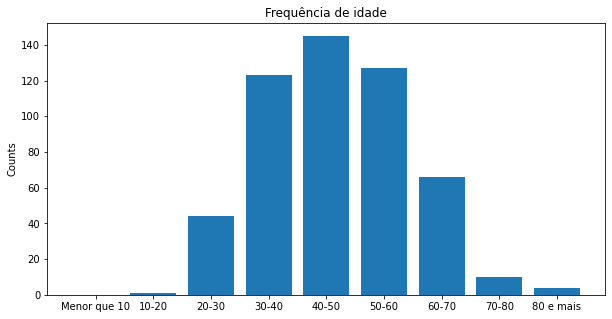

In [31]:
# Distribuição de dados por idade
plt.figure(figsize=(10,5))
plt.bar(idade['idade'],idade['Quantidade'])
plt.ylabel('Counts')
plt.title('Frequência de idade')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='idade'>

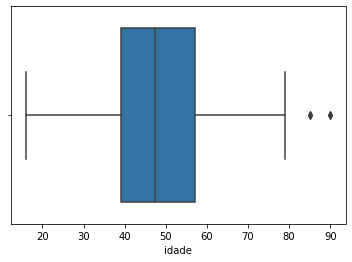

In [32]:
# Vendo outliers em idade usando BoxPlot
sns.boxplot(df['idade'])

#### Analisando as correlações e variáveis de interesse

In [33]:
# Métodod 1
df.corr()

,idade,gênero,poliúria,excesso_de_sede,perca_de_peso_repentina,fraqueza,polifagia,candidíase_vaginal,visão_embaçada,coceira,irritabilidade,cicatrização_demorada,paralisia_parcial,rigidez_muscular,queda_de_cabelo,obesidade,tem_diabetes
idade,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gênero,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
poliúria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
excesso_de_sede,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
perca_de_peso_repentina,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
fraqueza,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polifagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
candidíase_vaginal,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visão_embaçada,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
coceira,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


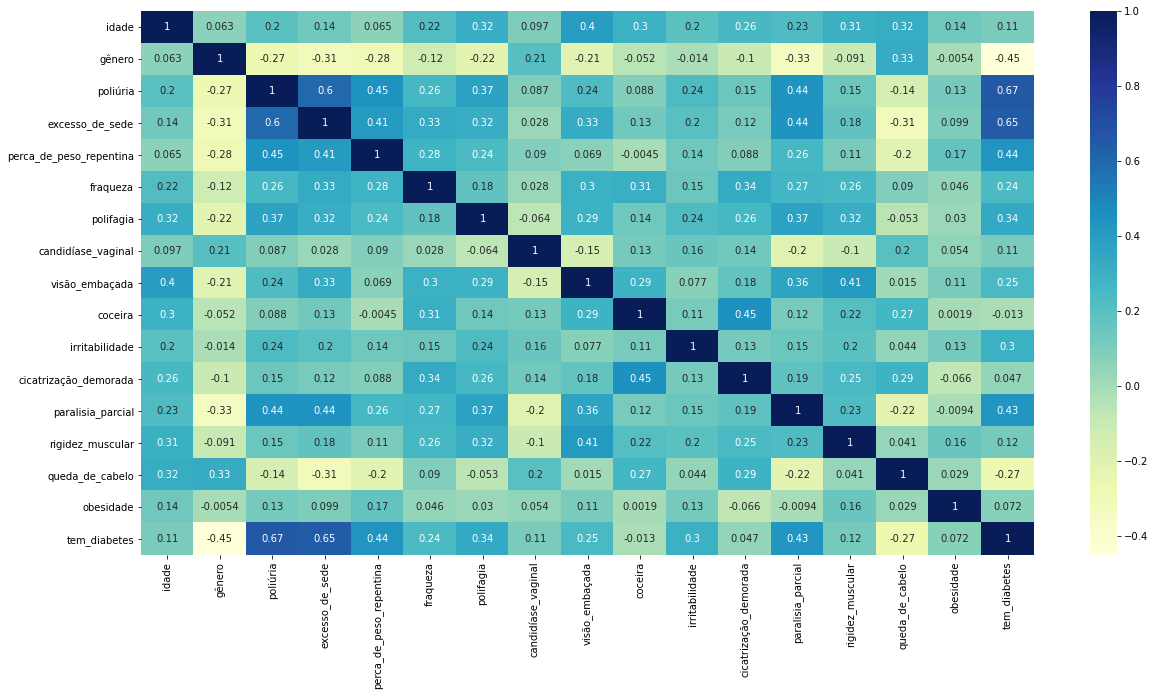

In [34]:
# Método 2- Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

<AxesSubplot:>

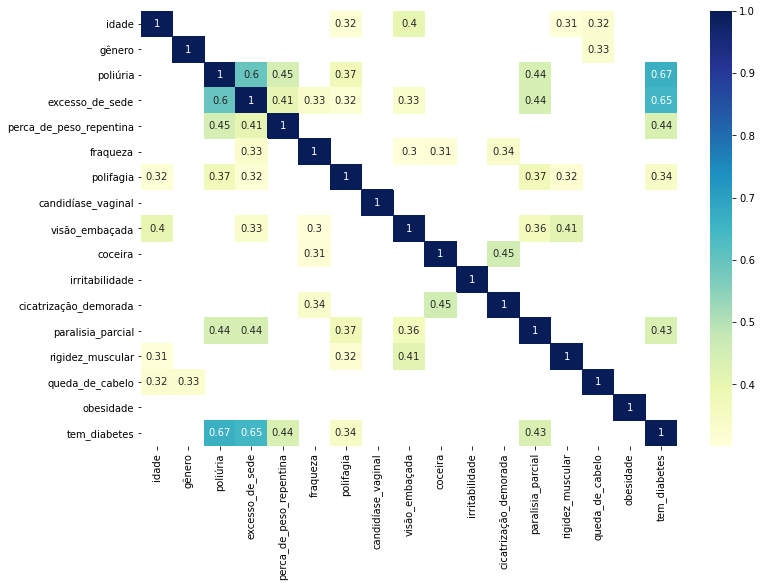

In [35]:
#Método 3 - Destacando
corr_matrix = df.corr()

highest_corr = corr_matrix[corr_matrix>=.3] #só mostra as correlações maiores que 0.30
plt.figure(figsize=(12,8))
sns.heatmap(highest_corr,annot=True, cmap="YlGnBu") #destaca as correlações mais altas (perto de 1)

## Selecionando as variáveis de interesse

Usando a função SelectKBest do scikit-learn conseguimos visualizar um score para cada variável, permitindo selecionar aquelas que aparentam ser mais importantes para definir se a pessoa tem ou não diabetes

In [36]:
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
#Definindo as Features and Labels
X = df[['idade', 'gênero', 'poliúria', 'excesso_de_sede', 'perca_de_peso_repentina',
       'fraqueza', 'polifagia', 'candidíase_vaginal', 'visão_embaçada',
       'coceira', 'irritabilidade', 'cicatrização_demorada',
       'paralisia_parcial', 'rigidez_muscular', 'queda_de_cabelo']]

y = df['obesidade']

In [38]:
# Usando o Selectkbest para achar os melhores scores
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(X,y) #fazendo o fit dos dados

In [39]:
# Mapeando o nome das colunas
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [40]:
nomes_features = pd.DataFrame(X.columns,columns=['Nome_feature'])
score_das_features = pd.concat([feature_scores,nomes_features],axis=1)

In [41]:
# List Features
score_das_features

,Feature_Scores,Nome_feature
0,31.478758,idade
1,0.005589,gênero
2,4.197035,poliúria
3,2.795364,excesso_de_sede
4,8.684107,perca_de_peso_repentina
5,0.448336,fraqueza
6,0.251062,polifagia
7,1.170556,candidíase_vaginal
8,3.410131,visão_embaçada
9,0.000958,coceira


In [42]:
#Ordenando de maior score para menor
#Quanto maior o score, mais importante a feature
score_das_features.nlargest(12,'Feature_Scores')

,Feature_Scores,Nome_feature
0,31.478758,idade
4,8.684107,perca_de_peso_repentina
13,8.207071,rigidez_muscular
10,6.435199,irritabilidade
2,4.197035,poliúria
8,3.410131,visão_embaçada
3,2.795364,excesso_de_sede
11,1.236641,cicatrização_demorada
7,1.170556,candidíase_vaginal
5,0.448336,fraqueza


A função ExtraTreesClassifier também da um score para cada variável. Vamos comparar os resultados com o SelectKBest

In [43]:
et_clf = ExtraTreesClassifier() #criando a instância
et_clf.fit(X,y) #fazendo o fit

feature_importance_df = pd.Series(et_clf.feature_importances_,index=X.columns) #criando o df
feature_importance_df.head()

idade                      0.174463
gênero                     0.060710
poliúria                   0.057986
excesso_de_sede            0.044020
perca_de_peso_repentina    0.072320
dtype: float64

<AxesSubplot:>

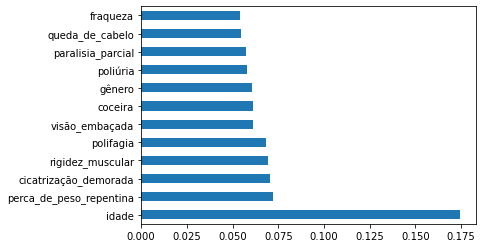

In [44]:
feature_importance_df.nlargest(12).plot(kind='barh')

#### Análise

+ Podemos observar que idade, perca de peso e rigidez muscular estão presentes no top 5 dos dois métodos. 

+ No SelectKBest temos também irritabilidade e poliúria.

+ No ExtraTreesClassifier temos cicatrização demorada e polifagia.


## Machine Learning

+ Estaremos construindo um modelo de classificação de aprendizado de máquina supervisionado usando os seguinte algoritmos:
    - LogisticRegression
    - Decision Tree 
    
+ Fica como sugestão para o futuro fazer o KNN

In [45]:
#Importanto os modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
print(X.columns)

Index(['idade', 'gênero', 'poliúria', 'excesso_de_sede',
       'perca_de_peso_repentina', 'fraqueza', 'polifagia',
       'candidíase_vaginal', 'visão_embaçada', 'coceira', 'irritabilidade',
       'cicatrização_demorada', 'paralisia_parcial', 'rigidez_muscular',
       'queda_de_cabelo'],
      dtype='object')


In [47]:
#Fazendo o split de treino e teste
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [48]:
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(x_train), len(x_test)))

Treinaremos com 364 elementos e testaremos com 156 elementos


### Regressão Logística

In [49]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train,y_train) #fazendo o fit do modelo com os dados

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [50]:
#Acurácia RL - Método 1
scoreRL = lr_model.score(x_test,y_test)

print("Acurácia do modelo RL por método score foi de {:2f}".format(scoreRL))

Acurácia do modelo RL por método score foi de 0.788462


In [51]:
#Acurácia RL - Método 2
y_pred = lr_model.predict(x_test)

print("Acurácia do modelo RL por comparação foi de {:2f}".format(accuracy_score(y_test,y_pred)))

Acurácia do modelo RL por comparação foi de 0.788462


#### Fazendo a análise da precisão do modelo usando:

+ Classification Report:
 - Esta função cria um relatório de texto mostrando as principais métricas de classificação, como precisão, recall, pontuação f1
 - Precisão: refere-se à capacidade do classificador de não rotular como positiva uma amostra negativa. É o número de resultados positivos verdadeiros dividido pelo número de todos os resultados positivos, incluindo aqueles não identificados corretamente.
 - Recall: refere-se à capacidade do classificador de encontrar todas as amostras positivas. É o número de resultados positivos verdadeiros dividido pelo número de todas as amostras que deveriam ter sido identificadas como positivas.
 - F1-score: o F1-score é a média harmônica da precisão e recall. O valor mais alto possível de uma pontuação F é 1,0, indicando precisão e rechamada perfeitas
 
+ Matriz de Confusão:
  - É uma tabela com duas linhas e duas colunas que relata o número de falsos positivos , falsos negativos , verdadeiros positivos e verdadeiros negativos
  
+ Curva ROC:
    - a curva ROC traça a taxa de verdadeiro positivo (outro nome para rechamada) em relação à taxa de falso positivo. Um classificador perfeito terá um ROC AUC igual a 1. De forma geral, temos a máxima da curva ROC, que diz que quanto mais para cima e esquerda, melhor o teste.

+ Curva de Recall de Precisão
    - As curvas de recuperação de precisão resumem a compensação entre a taxa positiva verdadeira e o valor preditivo positivo para um modelo preditivo usando diferentes limites de probabilidade.

+ Cross-validation

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [78]:
#Cross-validation - função
from sklearn.model_selection import cross_val_score

def cross_validate_model(model_estimator,X,y,cv):
    """Evaluate Model using cross validation of KFolds"""
    scores = cross_val_score(model_estimator, X, y, scoring='accuracy', cv=cv)
    
    #Resultado
    result = "Acurácia média: {:2f}  Desvio padrão : {:2f}".format(np.mean(scores), np.std(scores)) 
    return result

In [54]:
#Classification Report
target_names= ["Negativo(0)","Positivo(1)"]

print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Negativo(0)       0.79      0.99      0.88       122
 Positivo(1)       0.67      0.06      0.11        34

    accuracy                           0.79       156
   macro avg       0.73      0.53      0.49       156
weighted avg       0.76      0.79      0.71       156



In [55]:
#Matriz de confusão
confusion_matrix(y_test,y_pred)

array([[121,   1],
       [ 32,   2]], dtype=int64)

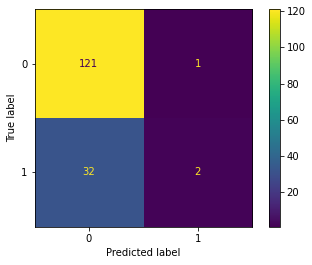

In [56]:
plot_confusion_matrix(lr_model,x_test,y_test)

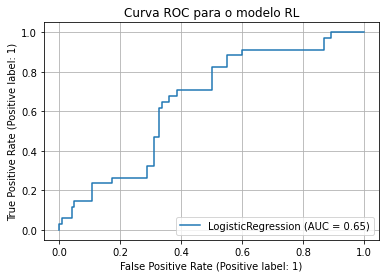

In [88]:
#Curva ROC
plot_roc_curve(lr_model, x_test, y_test)
plt.title("Curva ROC para o modelo RL")
plt.grid()
plt.show()

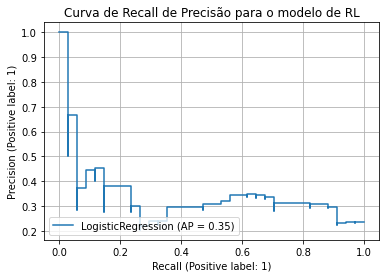

In [89]:
#Curva de Recall de Precisão
plot_precision_recall_curve(lr_model, x_test, y_test)
plt.title("Curva de Recall de Precisão para o modelo de RL")
plt.grid()
plt.show()

In [82]:
#Cross-validation - Modelo RL
cv_scores_for_rl_model = cross_validate_model(LogisticRegression(),X,y,5)
print(cv_scores_for_rl_model) #Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados

Acurácia média: 0.834615  Desvio padrão : 0.009421


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

### Decision Tree

In [60]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train) #fazendo o fit do modelo com os dados

DecisionTreeClassifier(random_state=42)

In [61]:
#Acurácia do modelo DT - Método 2
y_pred2 = dt_model.predict(x_test)
print("Acurácia do modelo DT por comparação foi de {:2f}".format(accuracy_score(y_test,y_pred2)))

Acurácia do modelo DT por comparação foi de 0.878205


+ Comparando os dois modelos, Regressão Logística e Decision Tree, a DT possui uma acurácia maior, sendo de 0.87 em comparação com os 0,78 da RL.

In [62]:
#Classification Report
print(classification_report(y_test,y_pred2,target_names=target_names))

              precision    recall  f1-score   support

 Negativo(0)       0.94      0.90      0.92       122
 Positivo(1)       0.69      0.79      0.74        34

    accuracy                           0.88       156
   macro avg       0.82      0.85      0.83       156
weighted avg       0.89      0.88      0.88       156



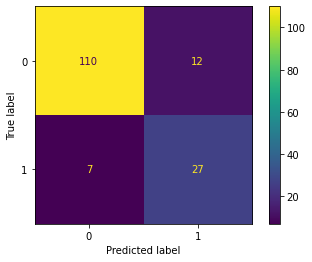

In [63]:
#Matriz de confusão
plot_confusion_matrix(dt_model,x_test,y_test)

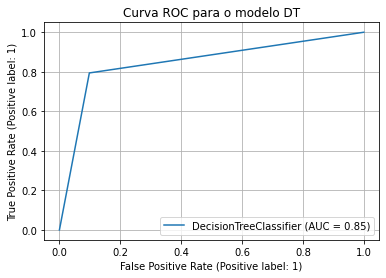

In [64]:
# Curva ROC
plot_roc_curve(dt_model, x_test, y_test)
plt.title("Curva ROC para o modelo DT")
plt.grid()
plt.show()

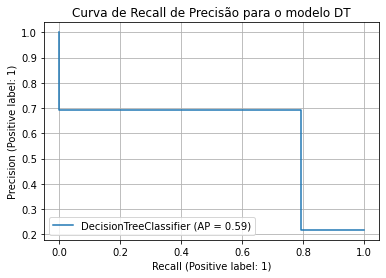

In [65]:
#Curva de Recall de Precisão
plot_precision_recall_curve(dt_model, x_test, y_test)
plt.title("Curva de Recall de Precisão para o modelo DT")
plt.grid()
plt.show()

In [80]:
#Cross-validation para DT
cv_scores_for_dt_model = cross_validate_model(DecisionTreeClassifier(random_state=42),X,y,5)
print(cv_scores_for_dt_model)

Acurácia média: 0.911538  Desvio padrão : 0.058772


In [83]:
#Relembrando o Cross-validation do RL
print(cv_scores_for_rl_model)

Acurácia média: 0.834615  Desvio padrão : 0.009421


#### Usando o F1-score para comparar a harmonia dos dois modelos
 + o F1-score é a média harmônica da precisão e recall. O valor mais alto possível de uma pontuação F é 1,0, indicando precisão e rechamada perfeitas

In [87]:
from sklearn.metrics import f1_score
f1_LR = f1_score(y_test, y_pred, average='macro')
f1_DT = f1_score(y_test, y_pred2, average='macro')

print("RL F1-score %.2F" % f1_LR)
print("DT F1-score %.2F" %f1_DT)

RL F1-score 0.49
DT F1-score 0.83


+ Comparando os dois modelos, Regressão Logística e Decision Tree, a DT possui um F1-score maior, sendo de 0.83 em comparação com os 0,49 da RL.

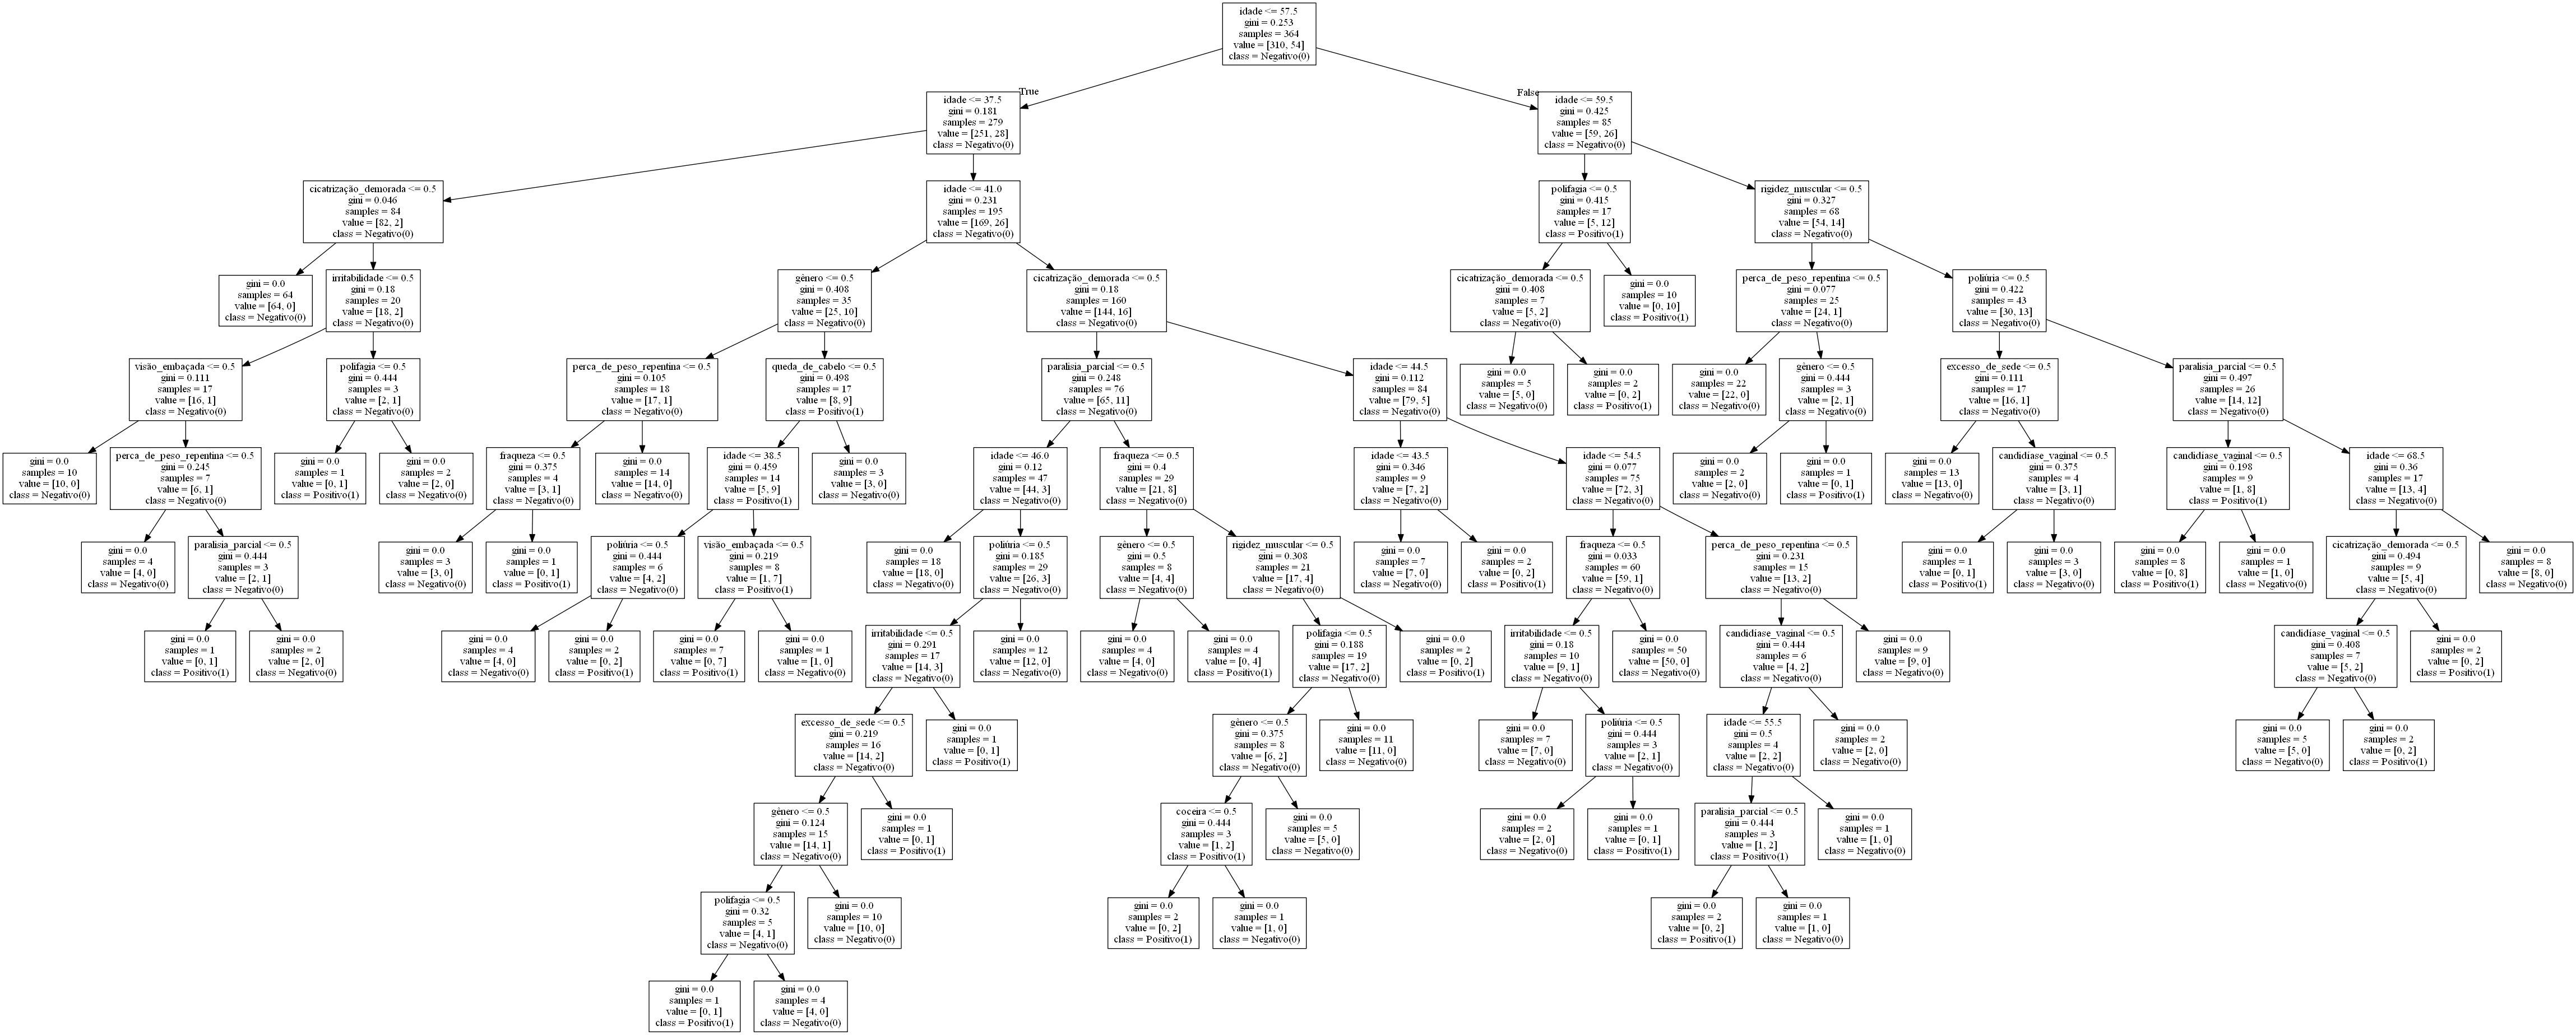

In [69]:
#Vamos ver um pouco como a Decision Tree funciona
from IPython.display import Image
from sklearn import tree
import pydotplus

feature_names = X.columns

#Cria um Dot Plot
dot_data = tree.export_graphviz(dt_model,out_file=None,feature_names=feature_names,class_names=target_names)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

### Conclusão

Nossa tarefa era construir um modelo de ML para prever o risco de diabetes em estágio inicial, dados os sintomas e sinais de um indivíduo.
Em nossa análise, descobrimos que as seguintes características tiveram maior importância e influência em nossa previsão do que as outras:

    - Idade
    - Perda de peso repentina
    - Rigidez muscular
    - Irritabilidade
    - Poliúria (Expelir quantidades anormalmente grandes de urina)
    - Cicatrização demorada
    - Polifagia  (Comer em excesso devido a fome excessiva ou apetite elevado)
    
Além disso, nossos modelos (LogisticRegression (0,79) e Decision Tree (0,88)) tiveram uma boa precisão, com o modelo classificador de Decision Tree sendo o mais alto.

Usando a validação cruzada, descobrimos que mesmo o modelo RL pode ser melhorado para nos dar uma precisão de 0,83 com um desvio padrão de 0,058, enquanto que o modelo DT foi de 0,91 com um desvio padrão de 0.0094.

Conclui-se então que aparentemente o DR se sai melhor do que o modelo RL.

#### Salvando os modelos

In [90]:
import joblib
print("Joblib",joblib.__version__)

Joblib 1.0.1


In [97]:
# RL
model_file_rl = open("logistic_regression_model_diabetes.pkl","wb")
joblib.dump(lr_model,model_file_rl)
model_file_rl.close()

In [98]:
# DT
model_file_dt = open("decision_tree_model_diabetes.pkl","wb")
joblib.dump(dt_model,model_file_dt)
model_file_dt.close()